In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import fftpack
from scipy import signal
import numpy as np
import pandas as pd

In [49]:
cd ~/Documents/01_SensorData/2016_04_12/cleaning-addingLABEL/

/home/takeyama/Documents/01_SensorData/2016_04_12/cleaning-addingLABEL


In [50]:
ls

20160331_180615.srt               exercises-1/
Cleaning-Conv-left-hand-ags.csv   exercises-2/
Cleaning-Conv-left-leg-ags.csv    exercises-3/
Cleaning-Conv-right-hand-ags.csv  exercises-4/
Cleaning-Conv-right-leg-ags.csv   exercises-5/
Cleaning-Conv-west-ags.csv        exercises-6/
CleaningConv-left-hand-ags.csv    exercises-finish/
CleaningConv-left-leg-ags.csv     exercises-start/
CleaningConv-right-hand-ags.csv   free/
CleaningConv-right-leg-ags.csv    get-away-things/
CleaningConv-west-ags.csv         grap-big-box/
Cleaning_left_hand_ags.csv        grap-bloom/
Conv-left-hand-ags.csv            grap-cleaner/
Conv-left-hand-batt.csv           grap-small-box/
Conv-left-leg-ags.csv             grap-small-box-one-hand/
Conv-left-leg-batt.csv            label-data.csv
Conv-right-hand-ags.csv           left-hand.csv
Conv-right-hand-batt.csv          left-leg.csv
Conv-right-leg-ags.csv            missing/
Conv-right-leg-batt.csv           put-away-bloom/
Conv-west-ags.csv                 pu

In [51]:
data = pd.read_csv('Cleaning-Conv-left-hand-ags.csv')

In [52]:
# 歩いている時のスペクトルグラム　→　それぞれが正規分布に基づいていると考える。　→回転時のデータを1つひとつ検定する

In [53]:
left_hand = pd.read_csv('Cleaning-Conv-left-hand-ags.csv')
left_leg = pd.read_csv('Cleaning-Conv-left-leg-ags.csv')
right_hand = pd.read_csv('Cleaning-Conv-right-hand-ags.csv')
right_leg = pd.read_csv('Cleaning-Conv-right-leg-ags.csv')
west = pd.read_csv('Cleaning-Conv-west-ags.csv')

In [54]:
freq, P=signal.welch(df.AccX, 100, nperseg=512)

In [15]:
def OutputPeriodglam(data):
    freq, P=signal.welch(data, 100, nperseg=512)
    plt.figure()
    plt.plot(freq, 10*np.log10(P), "r", linewidth=2, label="test")
    plt.ylim=[-100,100]
    plt.xlabel("Frequency[Hz]")
    plt.ylabel("Power/frequency[dB/Hz]")
    plt.show()
    return freq, P

In [16]:
df=left_hand[left_hand.label=='walking']

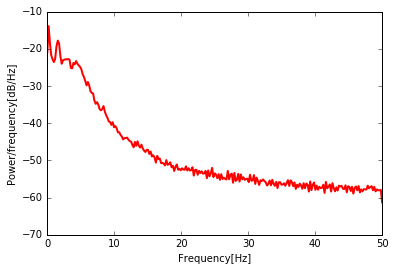

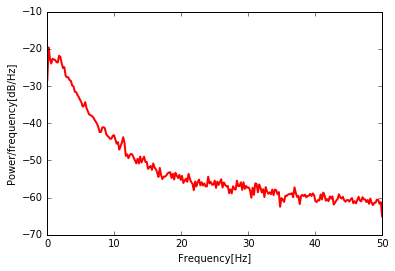

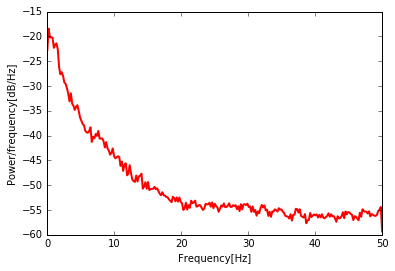

In [23]:
left_hand_freq_x,left_hand_power_x=OutputPeriodglam(df.AccX)
left_hand_freq_y,left_hand_power_y=OutputPeriodglam(df.AccY)
left_hand_freq_z,left_hand_power_z=OutputPeriodglam(df.AccZ)
data=pd.DataFrame({
    'X_freq':left_hand_freq_x,
    'X_power':left_hand_power_x,
    'Y_freq':left_hand_freq_y,
    'Y_power':left_hand_power_y,
    'Z_freq':left_hand_freq_z,
    'Z_power':left_hand_power_z}
)

In [88]:
def MakeSpectrolDataframe(DataName,label):
    d = pd.read_csv(DataName)
    df=d[d.label==label]
    freq_x,power_x,=OutputPeriodglam(df.AccX)
    freq_y,power_y=OutputPeriodglam(df.AccY)
    freq_z,power_z=OutputPeriodglam(df.AccZ)
    
    return freq_x,power_x,freq_y,power_y,freq_z,power_z

In [89]:
label=['Cleaning-Conv-left-hand-ags.csv','Cleaning-Conv-left-leg-ags.csv','Cleaning-Conv-right-hand-ags.csv',
       'Cleaning-Conv-right-leg-ags.csv','Cleaning-Conv-west-ags.csv']

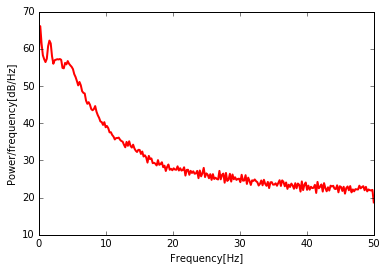

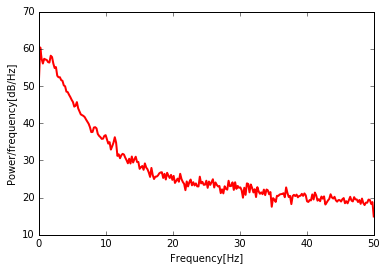

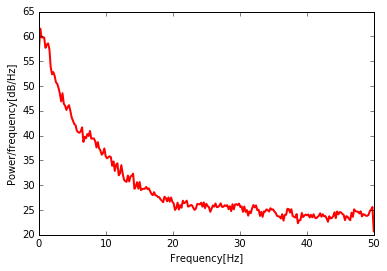

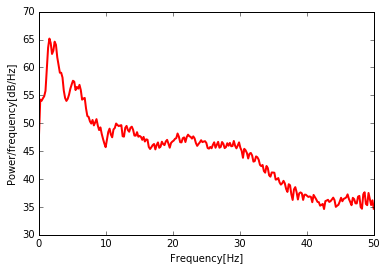

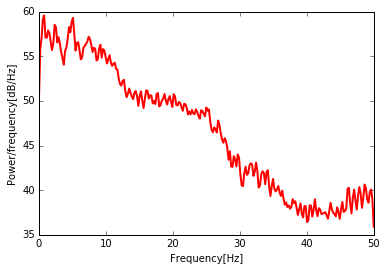

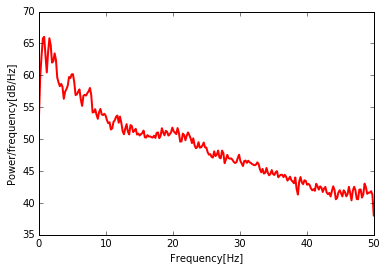

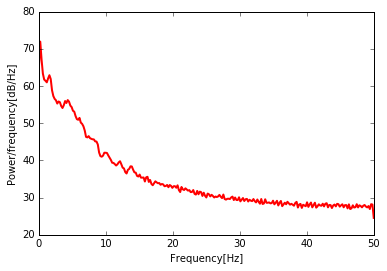

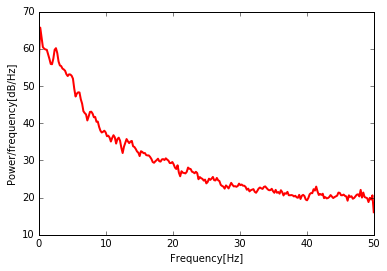

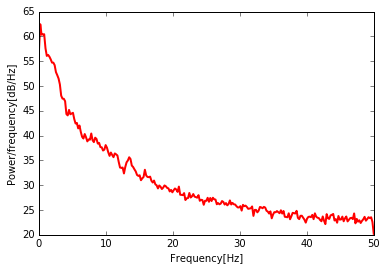

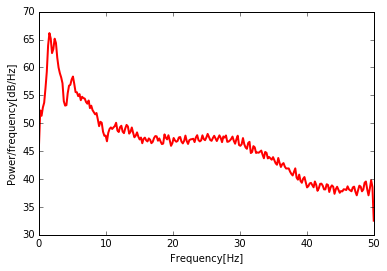

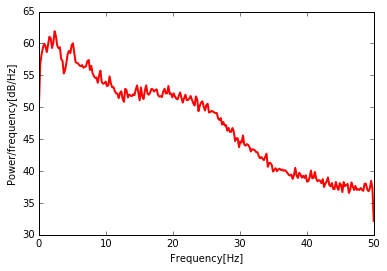

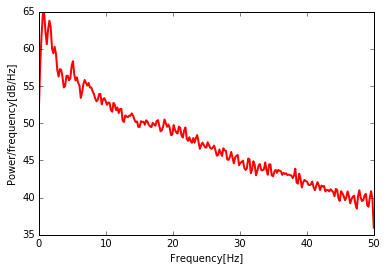

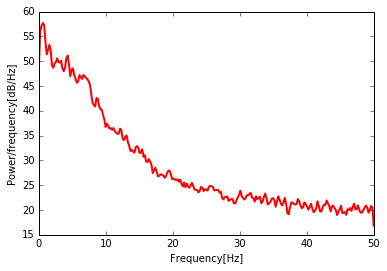

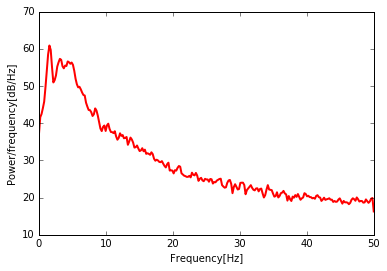

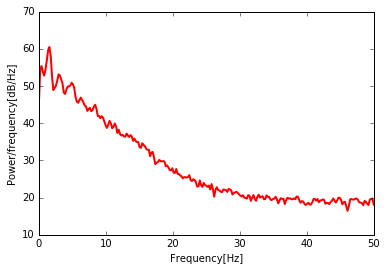

In [99]:
for i in label:
    Sdata=MakeSpectrolDataframe(i,'walking')
    SpecData=pd.DataFrame({
        'X_freq':Sdata[0],
        'X_power':Sdata[1],
        'Y_freq':Sdata[2],
        'Y_power':Sdata[3],
        'Z_freq':Sdata[4],
        'Z_power':Sdata[5]})
    FileName='Spectrol-'+i+'-'+'walking'+'.csv'
    SpecData.to_csv(FileName)

NameError: name 'SpecDf' is not defined